In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

118


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50360 stdev: 0.04791
Best fitness: 0.64750 - size: (2, 13) - species 2 - id 170
Average adjusted fitness: 0.117
Mean genetic distance 2.932, standard deviation 0.482
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.485 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52531 stdev: 0.05513
Best fitness: 0.67718 - size: (3, 13) - species 9 - id 229
Average adjusted fitness: 0.169
Mean genetic distance 3.005, standard deviation 0.470
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.463 sec (6.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53617 stdev: 0.06303
Best fitness: 0.67718 - size: (3, 13) - species 7 - id 229
Average adjusted fitness: 0.227
Mean genetic distance 2.982, standard deviation 0.478
Population of 201 members in 32 species
T

Population's average fitness: 0.51944 stdev: 0.09083
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.311
Mean genetic distance 2.924, standard deviation 0.456
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.552 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54686 stdev: 0.09606
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.235
Mean genetic distance 3.037, standard deviation 0.489
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.860 sec (5.706 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56437 stdev: 0.09386
Best fitness: 0.74335 - size: (2, 13) - species 17 - id 431
Average adjusted fitness: 0.239
Mean genetic distance 3.034, standard deviation 0.473
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.067 sec (5.827 average)

 ****** Running generation 3 *

Population's average fitness: 0.45209 stdev: 0.21413
Best fitness: 0.80581 - size: (2, 13) - species 7 - id 58
Average adjusted fitness: 0.290
Mean genetic distance 2.941, standard deviation 0.483
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.595 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57241 stdev: 0.22148
Best fitness: 0.80581 - size: (2, 13) - species 7 - id 58
Average adjusted fitness: 0.342
Mean genetic distance 3.044, standard deviation 0.445
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.372 sec (7.983 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61744 stdev: 0.21499
Best fitness: 0.80891 - size: (4, 15) - species 6 - id 489
Average adjusted fitness: 0.403
Mean genetic distance 3.063, standard deviation 0.446
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 9.139 sec (8.369 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48343 stdev: 0.08530
Best fitness: 0.69573 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.181
Mean genetic distance 2.926, standard deviation 0.457
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.139 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52952 stdev: 0.08411
Best fitness: 0.70254 - size: (3, 14) - species 3 - id 281
Average adjusted fitness: 0.171
Mean genetic distance 3.007, standard deviation 0.483
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.983 sec (6.061 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54935 stdev: 0.08371
Best fitness: 0.70254 - size: (3, 14) - species 3 - id 281
Average adjusted fitness: 0.190
Mean genetic distance 3.117, standard deviation 0.470
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.305 sec (6.142 average)

 ****** Running generation 3 ****

Population's average fitness: 0.44972 stdev: 0.14333
Best fitness: 0.75387 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.230
Mean genetic distance 2.887, standard deviation 0.503
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 5.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55392 stdev: 0.14644
Best fitness: 0.76623 - size: (3, 15) - species 1 - id 364
Average adjusted fitness: 0.275
Mean genetic distance 3.045, standard deviation 0.491
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.642 sec (6.011 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59337 stdev: 0.14702
Best fitness: 0.76623 - size: (3, 15) - species 20 - id 364
Average adjusted fitness: 0.369
Mean genetic distance 3.097, standard deviation 0.451
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.165 sec (6.062 average)

 ****** Running generation 3 *

Population's average fitness: 0.47661 stdev: 0.08599
Best fitness: 0.71119 - size: (2, 13) - species 3 - id 75
Average adjusted fitness: 0.221
Mean genetic distance 2.860, standard deviation 0.452
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.327 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53753 stdev: 0.09998
Best fitness: 0.77242 - size: (3, 15) - species 5 - id 377
Average adjusted fitness: 0.276
Mean genetic distance 2.975, standard deviation 0.455
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.615 sec (5.471 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55555 stdev: 0.08755
Best fitness: 0.77242 - size: (3, 15) - species 20 - id 377
Average adjusted fitness: 0.169
Mean genetic distance 3.106, standard deviation 0.475
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 5.973 sec (5.639 average)

 ****** Running generation 3 **

Population's average fitness: 0.57126 stdev: 0.21125
Best fitness: 0.88497 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.364
Mean genetic distance 2.982, standard deviation 0.480
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.557 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67767 stdev: 0.18065
Best fitness: 0.88497 - size: (2, 13) - species 7 - id 49
Average adjusted fitness: 0.495
Mean genetic distance 3.074, standard deviation 0.476
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 5.921 sec (5.739 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68913 stdev: 0.19088
Best fitness: 0.88497 - size: (2, 13) - species 7 - id 49
Average adjusted fitness: 0.477
Mean genetic distance 3.113, standard deviation 0.479
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.332 sec (5.937 average)

 ****** Running generation 3 *****

Population's average fitness: 0.49104 stdev: 0.07311
Best fitness: 0.68027 - size: (2, 13) - species 8 - id 94
Average adjusted fitness: 0.226
Mean genetic distance 2.973, standard deviation 0.479
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.512 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53321 stdev: 0.07832
Best fitness: 0.69944 - size: (3, 14) - species 7 - id 249
Average adjusted fitness: 0.236
Mean genetic distance 3.075, standard deviation 0.473
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.990 sec (5.751 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54874 stdev: 0.07727
Best fitness: 0.72171 - size: (4, 16) - species 32 - id 433
Average adjusted fitness: 0.177
Mean genetic distance 3.071, standard deviation 0.476
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.456 sec (5.986 average)

 ****** Running generation 3 **

Population's average fitness: 0.47283 stdev: 0.07619
Best fitness: 0.70872 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.129
Mean genetic distance 2.985, standard deviation 0.466
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.711 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52165 stdev: 0.08963
Best fitness: 0.72480 - size: (3, 15) - species 12 - id 232
Average adjusted fitness: 0.212
Mean genetic distance 3.105, standard deviation 0.484
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.713 sec (7.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54953 stdev: 0.08187
Best fitness: 0.72480 - size: (3, 15) - species 12 - id 232
Average adjusted fitness: 0.230
Mean genetic distance 3.111, standard deviation 0.487
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.691 sec (8.038 average)

 ****** Running generation 3 *

Population's average fitness: 0.45396 stdev: 0.20431
Best fitness: 0.81694 - size: (2, 13) - species 2 - id 142
Average adjusted fitness: 0.292
Mean genetic distance 2.814, standard deviation 0.458
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 6.958 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56479 stdev: 0.22527
Best fitness: 0.82437 - size: (2, 13) - species 2 - id 294
Average adjusted fitness: 0.427
Mean genetic distance 2.961, standard deviation 0.450
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.483 sec (7.220 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65711 stdev: 0.19793
Best fitness: 0.84168 - size: (3, 14) - species 5 - id 494
Average adjusted fitness: 0.477
Mean genetic distance 3.020, standard deviation 0.449
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.666 sec (7.035 average)

 ****** Running generation 3 **

Population's average fitness: 0.50000 stdev: 0.04780
Best fitness: 0.65863 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.181
Mean genetic distance 2.985, standard deviation 0.484
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52192 stdev: 0.05858
Best fitness: 0.68707 - size: (2, 14) - species 2 - id 331
Average adjusted fitness: 0.202
Mean genetic distance 3.074, standard deviation 0.500
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.435 sec (6.143 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53770 stdev: 0.05643
Best fitness: 0.70810 - size: (2, 14) - species 2 - id 520
Average adjusted fitness: 0.134
Mean genetic distance 3.064, standard deviation 0.497
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 6.748 sec (6.345 average)

 ****** Running generation 3 ***

Population's average fitness: 0.42509 stdev: 0.20959
Best fitness: 0.80767 - size: (2, 13) - species 5 - id 191
Average adjusted fitness: 0.251
Mean genetic distance 2.944, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.805 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59975 stdev: 0.20146
Best fitness: 0.80767 - size: (3, 15) - species 1 - id 270
Average adjusted fitness: 0.345
Mean genetic distance 3.117, standard deviation 0.505
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.362 sec (7.083 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62405 stdev: 0.20589
Best fitness: 0.80767 - size: (3, 15) - species 13 - id 501
Average adjusted fitness: 0.404
Mean genetic distance 3.127, standard deviation 0.502
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.023 sec (7.396 average)

 ****** Running generation 3 *

Population's average fitness: 0.46732 stdev: 0.14272
Best fitness: 0.74644 - size: (2, 13) - species 6 - id 64
Average adjusted fitness: 0.221
Mean genetic distance 2.850, standard deviation 0.482
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54611 stdev: 0.14686
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.266
Mean genetic distance 3.021, standard deviation 0.502
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 8.709 sec (8.215 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57612 stdev: 0.14956
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.272
Mean genetic distance 3.118, standard deviation 0.486
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 8.509 sec (8.313 average)

 ****** Running generation 3 *****

Population's average fitness: 0.48763 stdev: 0.09674
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.196
Mean genetic distance 2.913, standard deviation 0.444
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53920 stdev: 0.09514
Best fitness: 0.73717 - size: (2, 14) - species 7 - id 301
Average adjusted fitness: 0.236
Mean genetic distance 3.025, standard deviation 0.455
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 7.436 sec (7.236 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55661 stdev: 0.09772
Best fitness: 0.76314 - size: (3, 14) - species 12 - id 462
Average adjusted fitness: 0.270
Mean genetic distance 3.063, standard deviation 0.463
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.987 sec (7.486 average)

 ****** Running generation 3 **

Population's average fitness: 0.48105 stdev: 0.08667
Best fitness: 0.68955 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.201
Mean genetic distance 2.965, standard deviation 0.467
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53412 stdev: 0.08925
Best fitness: 0.68955 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.191
Mean genetic distance 3.013, standard deviation 0.474
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.825 sec (7.590 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55615 stdev: 0.08567
Best fitness: 0.70996 - size: (3, 15) - species 8 - id 499
Average adjusted fitness: 0.246
Mean genetic distance 3.101, standard deviation 0.490
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.395 sec (7.858 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50498 stdev: 0.06483
Best fitness: 0.68893 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.213
Mean genetic distance 2.915, standard deviation 0.457
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.367 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53177 stdev: 0.06740
Best fitness: 0.71861 - size: (3, 15) - species 7 - id 251
Average adjusted fitness: 0.202
Mean genetic distance 2.994, standard deviation 0.448
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.254 sec (7.811 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54498 stdev: 0.07640
Best fitness: 0.74212 - size: (4, 17) - species 14 - id 493
Average adjusted fitness: 0.181
Mean genetic distance 3.034, standard deviation 0.455
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 9.724 sec (8.449 average)

 ****** Running generation 3 *

Population's average fitness: 0.53410 stdev: 0.15002
Best fitness: 0.77304 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.287
Mean genetic distance 2.943, standard deviation 0.478
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.786 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60031 stdev: 0.13613
Best fitness: 0.78912 - size: (3, 15) - species 1 - id 331
Average adjusted fitness: 0.339
Mean genetic distance 3.062, standard deviation 0.522
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 7.936 sec (7.861 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61250 stdev: 0.13873
Best fitness: 0.78912 - size: (3, 15) - species 1 - id 331
Average adjusted fitness: 0.304
Mean genetic distance 3.082, standard deviation 0.514
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.422 sec (8.048 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48855 stdev: 0.15463
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 13
Average adjusted fitness: 0.200
Mean genetic distance 3.008, standard deviation 0.493
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55223 stdev: 0.15390
Best fitness: 0.79468 - size: (3, 15) - species 28 - id 362
Average adjusted fitness: 0.318
Mean genetic distance 3.071, standard deviation 0.503
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.795 sec (7.490 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58185 stdev: 0.15212
Best fitness: 0.79468 - size: (3, 15) - species 5 - id 362
Average adjusted fitness: 0.300
Mean genetic distance 3.100, standard deviation 0.517
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.223 sec (7.734 average)

 ****** Running generation 3 **

Population's average fitness: 0.48470 stdev: 0.10071
Best fitness: 0.72418 - size: (2, 13) - species 2 - id 20
Average adjusted fitness: 0.210
Mean genetic distance 2.882, standard deviation 0.458
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.333 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55418 stdev: 0.09628
Best fitness: 0.74954 - size: (2, 13) - species 15 - id 305
Average adjusted fitness: 0.250
Mean genetic distance 3.026, standard deviation 0.463
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.327 sec (8.330 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57210 stdev: 0.09111
Best fitness: 0.74954 - size: (2, 13) - species 15 - id 305
Average adjusted fitness: 0.258
Mean genetic distance 3.084, standard deviation 0.470
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 10.684 sec (9.115 average)

 ****** Running generation 3 

Population's average fitness: 0.46808 stdev: 0.14811
Best fitness: 0.72356 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.217
Mean genetic distance 2.910, standard deviation 0.487
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.166 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55186 stdev: 0.14502
Best fitness: 0.72851 - size: (2, 13) - species 23 - id 358
Average adjusted fitness: 0.262
Mean genetic distance 3.054, standard deviation 0.489
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.508 sec (6.337 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60147 stdev: 0.13284
Best fitness: 0.74150 - size: (2, 14) - species 4 - id 531
Average adjusted fitness: 0.301
Mean genetic distance 3.121, standard deviation 0.475
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.999 sec (6.558 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50329 stdev: 0.06413
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.188
Mean genetic distance 2.948, standard deviation 0.464
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.155 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53736 stdev: 0.06607
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.181
Mean genetic distance 3.027, standard deviation 0.462
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.505 sec (6.330 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53971 stdev: 0.06970
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.188
Mean genetic distance 3.029, standard deviation 0.483
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.680 sec (6.447 average)

 ****** Running generation 3 **

Population's average fitness: 0.43641 stdev: 0.21915
Best fitness: 0.80891 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.232
Mean genetic distance 2.882, standard deviation 0.465
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.093 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58133 stdev: 0.21128
Best fitness: 0.81880 - size: (3, 15) - species 5 - id 348
Average adjusted fitness: 0.389
Mean genetic distance 3.010, standard deviation 0.470
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.737 sec (6.415 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64900 stdev: 0.20047
Best fitness: 0.82066 - size: (4, 18) - species 4 - id 497
Average adjusted fitness: 0.434
Mean genetic distance 3.028, standard deviation 0.469
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.119 sec (6.650 average)

 ****** Running generation 3 **

Population's average fitness: 0.48257 stdev: 0.09024
Best fitness: 0.71367 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.186
Mean genetic distance 2.964, standard deviation 0.491
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.117 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54034 stdev: 0.09602
Best fitness: 0.71367 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.218
Mean genetic distance 3.015, standard deviation 0.484
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.663 sec (6.390 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55489 stdev: 0.09314
Best fitness: 0.71367 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.274
Mean genetic distance 3.033, standard deviation 0.494
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.741 sec (6.507 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.45736 stdev: 0.14483
Best fitness: 0.78169 - size: (2, 13) - species 2 - id 68
Average adjusted fitness: 0.228
Mean genetic distance 2.926, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.278 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56672 stdev: 0.15546
Best fitness: 0.78169 - size: (2, 13) - species 2 - id 68
Average adjusted fitness: 0.319
Mean genetic distance 3.045, standard deviation 0.481
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.655 sec (6.467 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58812 stdev: 0.15315
Best fitness: 0.78169 - size: (2, 13) - species 8 - id 68
Average adjusted fitness: 0.296
Mean genetic distance 3.070, standard deviation 0.478
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.902 sec (6.612 average)

 ****** Running generation 3 *****

Population's average fitness: 0.52230 stdev: 0.08333
Best fitness: 0.68336 - size: (2, 13) - species 5 - id 81
Average adjusted fitness: 0.230
Mean genetic distance 2.976, standard deviation 0.458
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.401 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54780 stdev: 0.08247
Best fitness: 0.68336 - size: (2, 13) - species 5 - id 81
Average adjusted fitness: 0.234
Mean genetic distance 3.022, standard deviation 0.463
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.672 sec (6.536 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56254 stdev: 0.08196
Best fitness: 0.70748 - size: (4, 16) - species 12 - id 394
Average adjusted fitness: 0.303
Mean genetic distance 2.962, standard deviation 0.456
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.908 sec (6.660 average)

 ****** Running generation 3 ***

Population's average fitness: 0.54748 stdev: 0.14214
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 80
Average adjusted fitness: 0.285
Mean genetic distance 2.892, standard deviation 0.475
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.288 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60949 stdev: 0.14210
Best fitness: 0.78912 - size: (3, 15) - species 2 - id 337
Average adjusted fitness: 0.315
Mean genetic distance 2.998, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.682 sec (6.485 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61380 stdev: 0.14570
Best fitness: 0.80458 - size: (4, 15) - species 10 - id 481
Average adjusted fitness: 0.304
Mean genetic distance 3.035, standard deviation 0.484
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 6.879 sec (6.616 average)

 ****** Running generation 3 **

Population's average fitness: 0.50095 stdev: 0.06127
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 112
Average adjusted fitness: 0.168
Mean genetic distance 2.958, standard deviation 0.463
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.752 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53866 stdev: 0.07193
Best fitness: 0.72356 - size: (3, 15) - species 1 - id 351
Average adjusted fitness: 0.198
Mean genetic distance 3.042, standard deviation 0.446
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.497 sec (7.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55376 stdev: 0.07167
Best fitness: 0.72851 - size: (4, 16) - species 26 - id 488
Average adjusted fitness: 0.174
Mean genetic distance 3.046, standard deviation 0.468
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.696 sec (7.982 average)

 ****** Running generation 3 *

Population's average fitness: 0.47333 stdev: 0.09639
Best fitness: 0.72604 - size: (2, 13) - species 4 - id 196
Average adjusted fitness: 0.211
Mean genetic distance 2.896, standard deviation 0.464
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.769 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53163 stdev: 0.09687
Best fitness: 0.72789 - size: (3, 14) - species 6 - id 373
Average adjusted fitness: 0.201
Mean genetic distance 2.960, standard deviation 0.447
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.037 sec (7.403 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55307 stdev: 0.09467
Best fitness: 0.78231 - size: (4, 17) - species 4 - id 519
Average adjusted fitness: 0.234
Mean genetic distance 3.000, standard deviation 0.472
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 13.357 sec (9.388 average)

 ****** Running generation 3 *

Population's average fitness: 0.52333 stdev: 0.08553
Best fitness: 0.76438 - size: (2, 13) - species 2 - id 23
Average adjusted fitness: 0.181
Mean genetic distance 2.942, standard deviation 0.494
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.491 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56609 stdev: 0.09305
Best fitness: 0.76438 - size: (2, 13) - species 4 - id 23
Average adjusted fitness: 0.301
Mean genetic distance 3.030, standard deviation 0.501
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.556 sec (8.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56603 stdev: 0.09870
Best fitness: 0.76438 - size: (2, 13) - species 22 - id 23
Average adjusted fitness: 0.243
Mean genetic distance 3.064, standard deviation 0.509
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.943 sec (8.330 average)

 ****** Running generation 3 ****

Population's average fitness: 0.46850 stdev: 0.14067
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 36
Average adjusted fitness: 0.280
Mean genetic distance 2.877, standard deviation 0.482
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 10.130 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56737 stdev: 0.14515
Best fitness: 0.74026 - size: (3, 13) - species 8 - id 242
Average adjusted fitness: 0.392
Mean genetic distance 3.032, standard deviation 0.484
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.979 sec (10.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59925 stdev: 0.14612
Best fitness: 0.77180 - size: (3, 14) - species 28 - id 504
Average adjusted fitness: 0.346
Mean genetic distance 3.070, standard deviation 0.459
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.594 sec (9.901 average)

 ****** Running generation 3 

Population's average fitness: 0.44780 stdev: 0.14160
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.194
Mean genetic distance 3.030, standard deviation 0.506
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.267 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55644 stdev: 0.15259
Best fitness: 0.78850 - size: (3, 14) - species 4 - id 305
Average adjusted fitness: 0.281
Mean genetic distance 3.107, standard deviation 0.495
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.910 sec (8.589 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58633 stdev: 0.15458
Best fitness: 0.78850 - size: (3, 14) - species 22 - id 305
Average adjusted fitness: 0.318
Mean genetic distance 3.105, standard deviation 0.494
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 9.447 sec (8.875 average)

 ****** Running generation 3 *

Population's average fitness: 0.49888 stdev: 0.06143
Best fitness: 0.71552 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.215
Mean genetic distance 2.933, standard deviation 0.514
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.566 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54294 stdev: 0.07386
Best fitness: 0.73902 - size: (3, 13) - species 1 - id 312
Average adjusted fitness: 0.204
Mean genetic distance 3.030, standard deviation 0.505
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.228 sec (7.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55256 stdev: 0.06784
Best fitness: 0.73902 - size: (3, 13) - species 1 - id 312
Average adjusted fitness: 0.169
Mean genetic distance 3.086, standard deviation 0.491
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.475 sec (8.090 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49786 stdev: 0.07273
Best fitness: 0.64997 - size: (2, 13) - species 2 - id 113
Average adjusted fitness: 0.212
Mean genetic distance 2.937, standard deviation 0.529
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53383 stdev: 0.07223
Best fitness: 0.72851 - size: (2, 13) - species 5 - id 369
Average adjusted fitness: 0.208
Mean genetic distance 3.086, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 13.324 sec (10.545 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54741 stdev: 0.07757
Best fitness: 0.76129 - size: (3, 15) - species 17 - id 542
Average adjusted fitness: 0.253
Mean genetic distance 3.134, standard deviation 0.489
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.508 sec (10.533 average)

 ****** Running generation

Population's average fitness: 0.48339 stdev: 0.09004
Best fitness: 0.67904 - size: (2, 13) - species 2 - id 89
Average adjusted fitness: 0.215
Mean genetic distance 2.853, standard deviation 0.421
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.845 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53744 stdev: 0.08878
Best fitness: 0.73160 - size: (3, 14) - species 6 - id 206
Average adjusted fitness: 0.217
Mean genetic distance 2.958, standard deviation 0.446
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.579 sec (8.212 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54181 stdev: 0.09638
Best fitness: 0.73160 - size: (3, 14) - species 2 - id 206
Average adjusted fitness: 0.232
Mean genetic distance 3.036, standard deviation 0.443
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.622 sec (8.682 average)

 ****** Running generation 3 ***

Population's average fitness: 0.53758 stdev: 0.14264
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 4
Average adjusted fitness: 0.258
Mean genetic distance 2.939, standard deviation 0.481
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 8.034 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62315 stdev: 0.11947
Best fitness: 0.77860 - size: (3, 14) - species 3 - id 359
Average adjusted fitness: 0.321
Mean genetic distance 3.040, standard deviation 0.469
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 9.579 sec (8.807 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61671 stdev: 0.14199
Best fitness: 0.77860 - size: (3, 14) - species 3 - id 359
Average adjusted fitness: 0.325
Mean genetic distance 3.089, standard deviation 0.448
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 10.784 sec (9.466 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50041 stdev: 0.06042
Best fitness: 0.67285 - size: (2, 13) - species 5 - id 142
Average adjusted fitness: 0.169
Mean genetic distance 2.899, standard deviation 0.455
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53301 stdev: 0.05896
Best fitness: 0.69202 - size: (2, 13) - species 26 - id 379
Average adjusted fitness: 0.144
Mean genetic distance 3.009, standard deviation 0.484
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.171 sec (9.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54405 stdev: 0.06494
Best fitness: 0.70192 - size: (3, 15) - species 26 - id 537
Average adjusted fitness: 0.171
Mean genetic distance 3.019, standard deviation 0.491
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.484 sec (9.509 average)

 ****** Running generation 3

Population's average fitness: 0.47232 stdev: 0.08779
Best fitness: 0.65553 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.170
Mean genetic distance 2.896, standard deviation 0.498
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.846 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53136 stdev: 0.09412
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 234
Average adjusted fitness: 0.228
Mean genetic distance 2.980, standard deviation 0.463
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.388 sec (7.117 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55837 stdev: 0.09239
Best fitness: 0.73531 - size: (2, 14) - species 12 - id 414
Average adjusted fitness: 0.199
Mean genetic distance 3.077, standard deviation 0.468
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.890 sec (7.374 average)

 ****** Running generation 3 **

Population's average fitness: 0.52708 stdev: 0.10329
Best fitness: 0.75881 - size: (2, 13) - species 7 - id 125
Average adjusted fitness: 0.356
Mean genetic distance 2.964, standard deviation 0.480
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.884 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53727 stdev: 0.12021
Best fitness: 0.80025 - size: (2, 14) - species 7 - id 373
Average adjusted fitness: 0.313
Mean genetic distance 3.032, standard deviation 0.492
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.142 sec (7.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55820 stdev: 0.12307
Best fitness: 0.80025 - size: (2, 14) - species 7 - id 373
Average adjusted fitness: 0.362
Mean genetic distance 3.017, standard deviation 0.462
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.694 sec (7.573 average)

 ****** Running generation 3 **

Population's average fitness: 0.52299 stdev: 0.09212
Best fitness: 0.69140 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.229
Mean genetic distance 2.956, standard deviation 0.451
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55478 stdev: 0.09352
Best fitness: 0.72913 - size: (3, 15) - species 32 - id 374
Average adjusted fitness: 0.214
Mean genetic distance 2.968, standard deviation 0.450
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.617 sec (7.302 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57546 stdev: 0.09441
Best fitness: 0.74088 - size: (4, 18) - species 28 - id 499
Average adjusted fitness: 0.272
Mean genetic distance 2.983, standard deviation 0.472
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.791 sec (7.465 average)

 ****** Running generation 3 

Population's average fitness: 0.48189 stdev: 0.07919
Best fitness: 0.69202 - size: (2, 13) - species 6 - id 194
Average adjusted fitness: 0.198
Mean genetic distance 2.977, standard deviation 0.475
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.817 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53799 stdev: 0.09074
Best fitness: 0.74644 - size: (2, 13) - species 7 - id 239
Average adjusted fitness: 0.202
Mean genetic distance 3.061, standard deviation 0.467
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.318 sec (7.068 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56698 stdev: 0.09160
Best fitness: 0.77180 - size: (3, 15) - species 7 - id 529
Average adjusted fitness: 0.190
Mean genetic distance 3.085, standard deviation 0.471
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.835 sec (7.324 average)

 ****** Running generation 3 **

Population's average fitness: 0.50048 stdev: 0.05166
Best fitness: 0.68893 - size: (2, 13) - species 4 - id 116
Average adjusted fitness: 0.153
Mean genetic distance 2.987, standard deviation 0.470
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53011 stdev: 0.05625
Best fitness: 0.68893 - size: (2, 13) - species 4 - id 116
Average adjusted fitness: 0.164
Mean genetic distance 3.047, standard deviation 0.455
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.770 sec (7.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54403 stdev: 0.06246
Best fitness: 0.70748 - size: (2, 15) - species 5 - id 469
Average adjusted fitness: 0.190
Mean genetic distance 3.019, standard deviation 0.473
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.778 sec (7.856 average)

 ****** Running generation 3 **

Population's average fitness: 0.51033 stdev: 0.06774
Best fitness: 0.69697 - size: (2, 13) - species 4 - id 108
Average adjusted fitness: 0.210
Mean genetic distance 2.960, standard deviation 0.495
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.870 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52424 stdev: 0.07157
Best fitness: 0.73284 - size: (3, 15) - species 21 - id 359
Average adjusted fitness: 0.209
Mean genetic distance 3.055, standard deviation 0.499
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.458 sec (7.164 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53997 stdev: 0.07875
Best fitness: 0.73284 - size: (3, 15) - species 21 - id 359
Average adjusted fitness: 0.213
Mean genetic distance 3.059, standard deviation 0.505
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.778 sec (7.369 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.52209 stdev: 0.09300
Best fitness: 0.71181 - size: (2, 13) - species 1 - id 146
Average adjusted fitness: 0.218
Mean genetic distance 2.995, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 11.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55997 stdev: 0.09145
Best fitness: 0.71552 - size: (3, 15) - species 4 - id 281
Average adjusted fitness: 0.203
Mean genetic distance 3.064, standard deviation 0.479
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.391 sec (11.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57425 stdev: 0.08487
Best fitness: 0.71552 - size: (3, 15) - species 2 - id 281
Average adjusted fitness: 0.230
Mean genetic distance 3.059, standard deviation 0.503
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.635 sec (10.22

Population's average fitness: 0.44563 stdev: 0.21858
Best fitness: 0.83179 - size: (2, 13) - species 2 - id 126
Average adjusted fitness: 0.261
Mean genetic distance 2.997, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59018 stdev: 0.21315
Best fitness: 0.87075 - size: (3, 15) - species 7 - id 344
Average adjusted fitness: 0.378
Mean genetic distance 3.029, standard deviation 0.494
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 10.054 sec (8.938 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62179 stdev: 0.21797
Best fitness: 0.89487 - size: (3, 16) - species 29 - id 530
Average adjusted fitness: 0.399
Mean genetic distance 3.062, standard deviation 0.451
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.512 sec (8.796 average)

 ****** Running generation 3 

Population's average fitness: 0.47780 stdev: 0.08452
Best fitness: 0.73779 - size: (2, 13) - species 1 - id 149
Average adjusted fitness: 0.229
Mean genetic distance 3.008, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.766 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53462 stdev: 0.08960
Best fitness: 0.73779 - size: (2, 13) - species 3 - id 149
Average adjusted fitness: 0.234
Mean genetic distance 3.025, standard deviation 0.476
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.379 sec (8.072 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56091 stdev: 0.09386
Best fitness: 0.77860 - size: (3, 14) - species 16 - id 425
Average adjusted fitness: 0.214
Mean genetic distance 3.031, standard deviation 0.470
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 8.661 sec (8.269 average)

 ****** Running generation 3 *

Population's average fitness: 0.54112 stdev: 0.14541
Best fitness: 0.77304 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.272
Mean genetic distance 2.915, standard deviation 0.457
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.902 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60217 stdev: 0.14603
Best fitness: 0.79530 - size: (3, 15) - species 2 - id 381
Average adjusted fitness: 0.298
Mean genetic distance 2.978, standard deviation 0.453
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.331 sec (7.116 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61162 stdev: 0.14927
Best fitness: 0.79530 - size: (3, 15) - species 2 - id 381
Average adjusted fitness: 0.293
Mean genetic distance 2.989, standard deviation 0.460
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.993 sec (7.409 average)

 ****** Running generation 3 **

Population's average fitness: 0.50177 stdev: 0.06379
Best fitness: 0.69573 - size: (2, 13) - species 2 - id 141
Average adjusted fitness: 0.218
Mean genetic distance 2.888, standard deviation 0.478
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.633 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53192 stdev: 0.06431
Best fitness: 0.73531 - size: (2, 12) - species 2 - id 202
Average adjusted fitness: 0.177
Mean genetic distance 3.016, standard deviation 0.471
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.066 sec (8.350 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54561 stdev: 0.07048
Best fitness: 0.76252 - size: (3, 15) - species 4 - id 443
Average adjusted fitness: 0.248
Mean genetic distance 3.107, standard deviation 0.478
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.457 sec (8.719 average)

 ****** Running generation 3 **

Population's average fitness: 0.52008 stdev: 0.08101
Best fitness: 0.67038 - size: (2, 13) - species 4 - id 28
Average adjusted fitness: 0.181
Mean genetic distance 2.908, standard deviation 0.456
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.654 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55092 stdev: 0.08450
Best fitness: 0.72665 - size: (2, 14) - species 2 - id 313
Average adjusted fitness: 0.274
Mean genetic distance 2.985, standard deviation 0.464
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.671 sec (7.663 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56070 stdev: 0.08715
Best fitness: 0.72665 - size: (2, 14) - species 10 - id 313
Average adjusted fitness: 0.230
Mean genetic distance 3.067, standard deviation 0.497
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 8.228 sec (7.851 average)

 ****** Running generation 3 **

Population's average fitness: 0.50361 stdev: 0.05366
Best fitness: 0.67965 - size: (2, 13) - species 3 - id 23
Average adjusted fitness: 0.124
Mean genetic distance 2.996, standard deviation 0.473
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.481 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52119 stdev: 0.05219
Best fitness: 0.67965 - size: (2, 13) - species 6 - id 23
Average adjusted fitness: 0.148
Mean genetic distance 3.047, standard deviation 0.486
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.303 sec (8.892 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53506 stdev: 0.05528
Best fitness: 0.67965 - size: (2, 13) - species 33 - id 23
Average adjusted fitness: 0.157
Mean genetic distance 3.053, standard deviation 0.476
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 10.503 sec (9.429 average)

 ****** Running generation 3 ***

Population's average fitness: 0.52095 stdev: 0.09233
Best fitness: 0.69821 - size: (2, 13) - species 5 - id 187
Average adjusted fitness: 0.213
Mean genetic distance 2.885, standard deviation 0.461
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.152 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54935 stdev: 0.08864
Best fitness: 0.69944 - size: (3, 15) - species 6 - id 229
Average adjusted fitness: 0.189
Mean genetic distance 2.940, standard deviation 0.476
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 12.047 sec (10.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56674 stdev: 0.09321
Best fitness: 0.73717 - size: (4, 17) - species 17 - id 451
Average adjusted fitness: 0.275
Mean genetic distance 2.993, standard deviation 0.484
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.736 sec (11.645 average)

 ****** Running generation

Population's average fitness: 0.50081 stdev: 0.07759
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 61
Average adjusted fitness: 0.325
Mean genetic distance 2.941, standard deviation 0.474
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.911 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52510 stdev: 0.07291
Best fitness: 0.75819 - size: (3, 14) - species 9 - id 213
Average adjusted fitness: 0.239
Mean genetic distance 3.050, standard deviation 0.488
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.204 sec (9.057 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53757 stdev: 0.08244
Best fitness: 0.78973 - size: (2, 14) - species 26 - id 528
Average adjusted fitness: 0.246
Mean genetic distance 3.084, standard deviation 0.496
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 11.075 sec (9.730 average)

 ****** Running generation 3 *

Population's average fitness: 0.47694 stdev: 0.09098
Best fitness: 0.72047 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.234
Mean genetic distance 2.958, standard deviation 0.497
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.937 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53819 stdev: 0.08812
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 276
Average adjusted fitness: 0.227
Mean genetic distance 3.060, standard deviation 0.509
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 11.737 sec (10.337 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55779 stdev: 0.09285
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 276
Average adjusted fitness: 0.242
Mean genetic distance 3.090, standard deviation 0.507
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 14.222 sec (11.632 average)

 ****** Running generation 3

Population's average fitness: 0.52054 stdev: 0.09109
Best fitness: 0.71923 - size: (2, 13) - species 2 - id 120
Average adjusted fitness: 0.232
Mean genetic distance 2.953, standard deviation 0.515
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.610 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55362 stdev: 0.08655
Best fitness: 0.71923 - size: (2, 13) - species 5 - id 120
Average adjusted fitness: 0.233
Mean genetic distance 3.036, standard deviation 0.513
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 9.356 sec (8.983 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56297 stdev: 0.09732
Best fitness: 0.71923 - size: (2, 13) - species 21 - id 120
Average adjusted fitness: 0.241
Mean genetic distance 3.008, standard deviation 0.522
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 9.502 sec (9.156 average)

 ****** Running generation 3 *

Population's average fitness: 0.48701 stdev: 0.09135
Best fitness: 0.69697 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.201
Mean genetic distance 2.975, standard deviation 0.457
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.537 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53454 stdev: 0.09753
Best fitness: 0.69697 - size: (2, 13) - species 3 - id 32
Average adjusted fitness: 0.183
Mean genetic distance 3.063, standard deviation 0.459
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.187 sec (8.862 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56412 stdev: 0.09043
Best fitness: 0.72542 - size: (3, 15) - species 2 - id 486
Average adjusted fitness: 0.198
Mean genetic distance 3.086, standard deviation 0.471
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.778 sec (9.167 average)

 ****** Running generation 3 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51873 stdev: 0.08800
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 21
Average adjusted fitness: 0.198
Mean genetic distance 2.897, standard deviation 0.502
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.539 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55653 stdev: 0.08945
Best fitness: 0.71243 - size: (3, 15) - species 5 - id 280
Average adjusted fitness: 0.246
Mean genetic distance 3.002, standard deviation 0.471
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 13.101 sec (12.820 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56860 stdev: 0.09089
Best fitness: 0.74521 - size: (4, 16) - species 3 - id 465
Average adjusted fitness: 0.234
Mean genetic distance 3.086, standard deviation 0.495
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 15.971 sec (13.87


 ****** Running generation 0 ****** 

Population's average fitness: 0.53906 stdev: 0.13755
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.263
Mean genetic distance 2.925, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 11.162 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59623 stdev: 0.14193
Best fitness: 0.77613 - size: (2, 13) - species 23 - id 346
Average adjusted fitness: 0.302
Mean genetic distance 2.985, standard deviation 0.495
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.334 sec (10.248 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60818 stdev: 0.14608
Best fitness: 0.81262 - size: (3, 16) - species 22 - id 434
Average adjusted fitness: 0.306
Mean genetic distance 2.997, standard deviation 0.481
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.311 sec (9.936


 ****** Running generation 0 ****** 

Population's average fitness: 0.44832 stdev: 0.14061
Best fitness: 0.78726 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.237
Mean genetic distance 3.014, standard deviation 0.510
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.801 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53138 stdev: 0.14376
Best fitness: 0.78726 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.250
Mean genetic distance 3.064, standard deviation 0.499
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.256 sec (9.028 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58194 stdev: 0.14248
Best fitness: 0.78726 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.271
Mean genetic distance 3.122, standard deviation 0.464
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.225 sec (9.427 aver

Population's average fitness: 0.50317 stdev: 0.05338
Best fitness: 0.65986 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.171
Mean genetic distance 2.941, standard deviation 0.483
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.930 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53288 stdev: 0.05753
Best fitness: 0.70748 - size: (3, 15) - species 3 - id 318
Average adjusted fitness: 0.200
Mean genetic distance 3.020, standard deviation 0.475
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 13.947 sec (11.438 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53420 stdev: 0.05992
Best fitness: 0.70748 - size: (3, 15) - species 23 - id 318
Average adjusted fitness: 0.159
Mean genetic distance 3.057, standard deviation 0.465
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 10.471 sec (11.116 average)

 ****** Running generation

Population's average fitness: 0.46836 stdev: 0.08461
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.237
Mean genetic distance 2.989, standard deviation 0.497
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.457 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53940 stdev: 0.08424
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.190
Mean genetic distance 3.053, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.254 sec (9.356 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55520 stdev: 0.08454
Best fitness: 0.69264 - size: (3, 13) - species 18 - id 496
Average adjusted fitness: 0.216
Mean genetic distance 3.028, standard deviation 0.492
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.500 sec (9.404 average)

 ****** Running generation 3 *

Population's average fitness: 0.47708 stdev: 0.09282
Best fitness: 0.72789 - size: (2, 13) - species 4 - id 18
Average adjusted fitness: 0.190
Mean genetic distance 2.930, standard deviation 0.474
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.525 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52543 stdev: 0.09687
Best fitness: 0.77180 - size: (3, 14) - species 27 - id 372
Average adjusted fitness: 0.214
Mean genetic distance 3.023, standard deviation 0.461
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.199 sec (8.862 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55879 stdev: 0.09340
Best fitness: 0.77180 - size: (3, 14) - species 27 - id 372
Average adjusted fitness: 0.236
Mean genetic distance 3.048, standard deviation 0.470
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.556 sec (9.093 average)

 ****** Running generation 3 *

Population's average fitness: 0.54051 stdev: 0.29048
Best fitness: 0.93939 - size: (2, 13) - species 2 - id 70
Average adjusted fitness: 0.448
Mean genetic distance 2.969, standard deviation 0.471
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68382 stdev: 0.26364
Best fitness: 0.94558 - size: (3, 15) - species 29 - id 384
Average adjusted fitness: 0.545
Mean genetic distance 3.067, standard deviation 0.482
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.817 sec (9.919 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.76081 stdev: 0.23413
Best fitness: 0.97526 - size: (4, 17) - species 28 - id 508
Average adjusted fitness: 0.678
Mean genetic distance 3.071, standard deviation 0.490
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.759 sec (9.866 average)

 ****** Running generation 3 

Population's average fitness: 0.53407 stdev: 0.09043
Best fitness: 0.69635 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.306
Mean genetic distance 3.002, standard deviation 0.488
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.540 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55937 stdev: 0.10096
Best fitness: 0.75201 - size: (2, 14) - species 2 - id 222
Average adjusted fitness: 0.328
Mean genetic distance 3.090, standard deviation 0.488
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 11.891 sec (11.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58656 stdev: 0.10802
Best fitness: 0.76871 - size: (4, 17) - species 24 - id 521
Average adjusted fitness: 0.369
Mean genetic distance 3.190, standard deviation 0.486
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 10.048 sec (11.160 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.52254 stdev: 0.08875
Best fitness: 0.73346 - size: (2, 13) - species 10 - id 166
Average adjusted fitness: 0.240
Mean genetic distance 2.899, standard deviation 0.480
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 12.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55502 stdev: 0.09457
Best fitness: 0.77922 - size: (3, 15) - species 8 - id 340
Average adjusted fitness: 0.237
Mean genetic distance 2.947, standard deviation 0.499
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.745 sec (11.456 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57468 stdev: 0.10613
Best fitness: 0.77922 - size: (3, 15) - species 10 - id 340
Average adjusted fitness: 0.273
Mean genetic distance 3.041, standard deviation 0.482
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 9.617 sec (10.

Population's average fitness: 0.45682 stdev: 0.14184
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 197
Average adjusted fitness: 0.213
Mean genetic distance 2.958, standard deviation 0.464
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.333 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58805 stdev: 0.13368
Best fitness: 0.73779 - size: (2, 14) - species 4 - id 285
Average adjusted fitness: 0.296
Mean genetic distance 3.048, standard deviation 0.453
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.660 sec (9.496 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60353 stdev: 0.13139
Best fitness: 0.75819 - size: (3, 15) - species 4 - id 532
Average adjusted fitness: 0.315
Mean genetic distance 3.065, standard deviation 0.463
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 11.786 sec (10.259 average)

 ****** Running generation 3

Population's average fitness: 0.47703 stdev: 0.14711
Best fitness: 0.73408 - size: (2, 13) - species 1 - id 83
Average adjusted fitness: 0.206
Mean genetic distance 2.993, standard deviation 0.508
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 8.421 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54965 stdev: 0.14884
Best fitness: 0.77798 - size: (2, 14) - species 1 - id 363
Average adjusted fitness: 0.267
Mean genetic distance 3.112, standard deviation 0.529
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 9.009 sec (8.715 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59404 stdev: 0.13611
Best fitness: 0.79901 - size: (2, 15) - species 25 - id 533
Average adjusted fitness: 0.297
Mean genetic distance 3.115, standard deviation 0.500
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.411 sec (8.947 average)

 ****** Running generation 3 **

Population's average fitness: 0.47565 stdev: 0.08505
Best fitness: 0.67780 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.154
Mean genetic distance 2.952, standard deviation 0.482
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 9.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52851 stdev: 0.08164
Best fitness: 0.69450 - size: (3, 15) - species 14 - id 253
Average adjusted fitness: 0.187
Mean genetic distance 3.094, standard deviation 0.499
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 11.093 sec (10.412 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53161 stdev: 0.08885
Best fitness: 0.69450 - size: (3, 15) - species 14 - id 253
Average adjusted fitness: 0.201
Mean genetic distance 3.168, standard deviation 0.484
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.781 sec (10.201 average)

 ****** Running generation 

Population's average fitness: 0.46089 stdev: 0.14114
Best fitness: 0.73840 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.172
Mean genetic distance 2.952, standard deviation 0.449
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.618 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55342 stdev: 0.14019
Best fitness: 0.74088 - size: (2, 12) - species 1 - id 319
Average adjusted fitness: 0.282
Mean genetic distance 3.046, standard deviation 0.447
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 9.102 sec (8.860 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58251 stdev: 0.13749
Best fitness: 0.74088 - size: (2, 12) - species 1 - id 319
Average adjusted fitness: 0.317
Mean genetic distance 3.041, standard deviation 0.443
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 9.589 sec (9.103 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50528 stdev: 0.05535
Best fitness: 0.66729 - size: (2, 13) - species 1 - id 72
Average adjusted fitness: 0.151
Mean genetic distance 2.923, standard deviation 0.452
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.459 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52852 stdev: 0.06490
Best fitness: 0.70563 - size: (3, 15) - species 7 - id 309
Average adjusted fitness: 0.171
Mean genetic distance 2.970, standard deviation 0.455
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 9.289 sec (8.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54130 stdev: 0.06728
Best fitness: 0.72109 - size: (3, 15) - species 5 - id 527
Average adjusted fitness: 0.179
Mean genetic distance 3.015, standard deviation 0.456
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.812 sec (9.187 ave

Population's average fitness: 0.44261 stdev: 0.19947
Best fitness: 0.80334 - size: (2, 13) - species 6 - id 50
Average adjusted fitness: 0.273
Mean genetic distance 2.901, standard deviation 0.482
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.516 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57308 stdev: 0.21663
Best fitness: 0.81880 - size: (2, 14) - species 1 - id 365
Average adjusted fitness: 0.395
Mean genetic distance 2.998, standard deviation 0.465
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 9.000 sec (8.758 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65080 stdev: 0.19463
Best fitness: 0.81880 - size: (2, 14) - species 9 - id 365
Average adjusted fitness: 0.438
Mean genetic distance 2.997, standard deviation 0.469
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.567 sec (9.028 average)

 ****** Running generation 3 ***

Population's average fitness: 0.45698 stdev: 0.13910
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 103
Average adjusted fitness: 0.155
Mean genetic distance 2.865, standard deviation 0.481
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.367 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55011 stdev: 0.14791
Best fitness: 0.75077 - size: (3, 14) - species 1 - id 381
Average adjusted fitness: 0.279
Mean genetic distance 3.007, standard deviation 0.451
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.796 sec (9.581 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61310 stdev: 0.13049
Best fitness: 0.75077 - size: (3, 14) - species 1 - id 381
Average adjusted fitness: 0.370
Mean genetic distance 3.076, standard deviation 0.457
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 9.494 sec (9.552 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47651 stdev: 0.08874
Best fitness: 0.66048 - size: (2, 13) - species 6 - id 81
Average adjusted fitness: 0.246
Mean genetic distance 2.950, standard deviation 0.467
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 11.988 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52646 stdev: 0.09413
Best fitness: 0.74459 - size: (3, 14) - species 27 - id 375
Average adjusted fitness: 0.292
Mean genetic distance 3.053, standard deviation 0.455
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 12.892 sec (12.440 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55686 stdev: 0.09327
Best fitness: 0.81076 - size: (4, 13) - species 27 - id 534
Average adjusted fitness: 0.300
Mean genetic distance 3.081, standard deviation 0.445
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 10.774 sec (11.

Population's average fitness: 0.52616 stdev: 0.09151
Best fitness: 0.75634 - size: (2, 13) - species 4 - id 186
Average adjusted fitness: 0.272
Mean genetic distance 2.864, standard deviation 0.433
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 9.248 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55974 stdev: 0.09191
Best fitness: 0.75634 - size: (2, 13) - species 4 - id 186
Average adjusted fitness: 0.205
Mean genetic distance 2.995, standard deviation 0.460
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 10.500 sec (9.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57712 stdev: 0.09364
Best fitness: 0.75634 - size: (2, 13) - species 25 - id 186
Average adjusted fitness: 0.268
Mean genetic distance 3.045, standard deviation 0.487
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 13.109 sec (10.953 average)

 ****** Running generation 

Population's average fitness: 0.50198 stdev: 0.05202
Best fitness: 0.71181 - size: (2, 13) - species 1 - id 122
Average adjusted fitness: 0.140
Mean genetic distance 2.900, standard deviation 0.481
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.117 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52571 stdev: 0.05789
Best fitness: 0.71181 - size: (2, 13) - species 1 - id 122
Average adjusted fitness: 0.150
Mean genetic distance 2.972, standard deviation 0.496
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 15.262 sec (14.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53178 stdev: 0.06914
Best fitness: 0.76994 - size: (4, 16) - species 22 - id 517
Average adjusted fitness: 0.192
Mean genetic distance 3.054, standard deviation 0.509
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 17.043 sec (15.141 average)

 ****** Running generatio

Population's average fitness: 0.49457 stdev: 0.06268
Best fitness: 0.67161 - size: (2, 13) - species 7 - id 64
Average adjusted fitness: 0.234
Mean genetic distance 2.978, standard deviation 0.525
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.640 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53277 stdev: 0.06527
Best fitness: 0.71676 - size: (2, 13) - species 15 - id 360
Average adjusted fitness: 0.207
Mean genetic distance 3.054, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.096 sec (9.868 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55126 stdev: 0.07154
Best fitness: 0.72604 - size: (3, 15) - species 5 - id 464
Average adjusted fitness: 0.189
Mean genetic distance 3.100, standard deviation 0.475
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.960 sec (10.232 average)

 ****** Running generation 3

Population's average fitness: 0.52342 stdev: 0.10424
Best fitness: 0.78293 - size: (2, 13) - species 3 - id 99
Average adjusted fitness: 0.267
Mean genetic distance 2.814, standard deviation 0.425
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.601 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56357 stdev: 0.10791
Best fitness: 0.78293 - size: (2, 13) - species 3 - id 99
Average adjusted fitness: 0.299
Mean genetic distance 2.916, standard deviation 0.440
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 10.413 sec (10.007 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59391 stdev: 0.10086
Best fitness: 0.82127 - size: (3, 14) - species 3 - id 528
Average adjusted fitness: 0.275
Mean genetic distance 2.958, standard deviation 0.458
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.570 sec (10.195 average)

 ****** Running generation 3 

Population's average fitness: 0.58312 stdev: 0.12653
Best fitness: 0.76685 - size: (2, 13) - species 4 - id 170
Average adjusted fitness: 0.300
Mean genetic distance 2.943, standard deviation 0.481
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.779 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60974 stdev: 0.13426
Best fitness: 0.82251 - size: (2, 13) - species 24 - id 347
Average adjusted fitness: 0.333
Mean genetic distance 3.048, standard deviation 0.494
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 11.243 sec (10.511 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63716 stdev: 0.12022
Best fitness: 0.83117 - size: (3, 15) - species 5 - id 531
Average adjusted fitness: 0.356
Mean genetic distance 3.059, standard deviation 0.505
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 17.392 sec (12.805 average)

 ****** Running generation

Population's average fitness: 0.42020 stdev: 0.27748
Best fitness: 0.93135 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.355
Mean genetic distance 2.924, standard deviation 0.427
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.461 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61560 stdev: 0.29342
Best fitness: 0.93135 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.523
Mean genetic distance 2.912, standard deviation 0.446
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.342 sec (9.902 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70440 stdev: 0.26125
Best fitness: 0.93135 - size: (2, 13) - species 32 - id 56
Average adjusted fitness: 0.603
Mean genetic distance 2.902, standard deviation 0.496
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 10.355 sec (10.053 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.50796 stdev: 0.05826
Best fitness: 0.67656 - size: (2, 13) - species 4 - id 21
Average adjusted fitness: 0.190
Mean genetic distance 2.890, standard deviation 0.499
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52974 stdev: 0.07250
Best fitness: 0.75015 - size: (3, 14) - species 11 - id 229
Average adjusted fitness: 0.211
Mean genetic distance 2.999, standard deviation 0.483
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.279 sec (20.594 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55058 stdev: 0.07352
Best fitness: 0.75819 - size: (3, 15) - species 11 - id 536
Average adjusted fitness: 0.171
Mean genetic distance 3.117, standard deviation 0.497
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.777 sec (18.

Population's average fitness: 0.47495 stdev: 0.08915
Best fitness: 0.66976 - size: (2, 13) - species 1 - id 123
Average adjusted fitness: 0.173
Mean genetic distance 2.865, standard deviation 0.461
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52337 stdev: 0.09411
Best fitness: 0.74459 - size: (3, 15) - species 4 - id 351
Average adjusted fitness: 0.216
Mean genetic distance 2.948, standard deviation 0.475
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 15.020 sec (14.317 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55124 stdev: 0.09233
Best fitness: 0.74459 - size: (3, 15) - species 1 - id 351
Average adjusted fitness: 0.178
Mean genetic distance 3.009, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 16.337 sec (14.990 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.52429 stdev: 0.08855
Best fitness: 0.70996 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.253
Mean genetic distance 3.046, standard deviation 0.515
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.502 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57053 stdev: 0.08517
Best fitness: 0.72851 - size: (3, 15) - species 17 - id 310
Average adjusted fitness: 0.207
Mean genetic distance 3.100, standard deviation 0.496
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 12.062 sec (15.782 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57364 stdev: 0.08854
Best fitness: 0.73036 - size: (3, 16) - species 24 - id 482
Average adjusted fitness: 0.200
Mean genetic distance 3.089, standard deviation 0.483
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 10.745 sec (14.

Population's average fitness: 0.49677 stdev: 0.04571
Best fitness: 0.65059 - size: (2, 13) - species 8 - id 165
Average adjusted fitness: 0.136
Mean genetic distance 2.956, standard deviation 0.468
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.031 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51860 stdev: 0.04615
Best fitness: 0.65059 - size: (2, 13) - species 8 - id 165
Average adjusted fitness: 0.166
Mean genetic distance 3.042, standard deviation 0.471
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 11.216 sec (11.123 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52521 stdev: 0.05653
Best fitness: 0.65368 - size: (3, 14) - species 36 - id 529
Average adjusted fitness: 0.179
Mean genetic distance 3.091, standard deviation 0.478
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 14.727 sec (12.324 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.45382 stdev: 0.16356
Best fitness: 0.85776 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.332
Mean genetic distance 2.930, standard deviation 0.504
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.361 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54562 stdev: 0.16707
Best fitness: 0.85776 - size: (2, 13) - species 3 - id 106
Average adjusted fitness: 0.299
Mean genetic distance 3.072, standard deviation 0.503
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.003 sec (17.682 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57775 stdev: 0.17196
Best fitness: 0.86642 - size: (3, 15) - species 22 - id 529
Average adjusted fitness: 0.300
Mean genetic distance 3.095, standard deviation 0.501
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 16.321 sec (17.

Population's average fitness: 0.54331 stdev: 0.12967
Best fitness: 0.74397 - size: (2, 13) - species 5 - id 74
Average adjusted fitness: 0.300
Mean genetic distance 2.969, standard deviation 0.454
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.897 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61945 stdev: 0.12106
Best fitness: 0.76438 - size: (3, 15) - species 4 - id 342
Average adjusted fitness: 0.298
Mean genetic distance 3.059, standard deviation 0.454
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 16.612 sec (15.755 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63168 stdev: 0.12482
Best fitness: 0.76438 - size: (3, 15) - species 1 - id 506
Average adjusted fitness: 0.316
Mean genetic distance 3.077, standard deviation 0.439
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 15.653 sec (15.721 average)

 ****** Running generation 

Population's average fitness: 0.45856 stdev: 0.14151
Best fitness: 0.74212 - size: (2, 13) - species 5 - id 120
Average adjusted fitness: 0.239
Mean genetic distance 2.935, standard deviation 0.477
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.529 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54865 stdev: 0.14586
Best fitness: 0.76933 - size: (3, 15) - species 23 - id 352
Average adjusted fitness: 0.266
Mean genetic distance 3.045, standard deviation 0.478
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.453 sec (12.991 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58944 stdev: 0.13970
Best fitness: 0.76933 - size: (3, 15) - species 23 - id 352
Average adjusted fitness: 0.294
Mean genetic distance 3.096, standard deviation 0.483
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 13.525 sec (13.169 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.50130 stdev: 0.04763
Best fitness: 0.65986 - size: (2, 13) - species 5 - id 95
Average adjusted fitness: 0.172
Mean genetic distance 2.973, standard deviation 0.521
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 15.715 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52660 stdev: 0.05052
Best fitness: 0.66543 - size: (3, 14) - species 8 - id 346
Average adjusted fitness: 0.144
Mean genetic distance 3.090, standard deviation 0.505
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 16.635 sec (16.175 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52750 stdev: 0.05546
Best fitness: 0.66543 - size: (3, 14) - species 8 - id 346
Average adjusted fitness: 0.199
Mean genetic distance 3.150, standard deviation 0.499
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 14.292 sec (15.54

Population's average fitness: 0.45439 stdev: 0.20532
Best fitness: 0.81509 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.259
Mean genetic distance 2.948, standard deviation 0.475
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 12.726 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61432 stdev: 0.19868
Best fitness: 0.82251 - size: (3, 15) - species 19 - id 322
Average adjusted fitness: 0.423
Mean genetic distance 3.084, standard deviation 0.469
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 13.412 sec (13.069 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67585 stdev: 0.19118
Best fitness: 0.83426 - size: (3, 16) - species 22 - id 394
Average adjusted fitness: 0.473
Mean genetic distance 3.121, standard deviation 0.486
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 14.026 sec (13.388 average)

 ****** Running generati

Population's average fitness: 0.45077 stdev: 0.13200
Best fitness: 0.71614 - size: (2, 13) - species 5 - id 47
Average adjusted fitness: 0.238
Mean genetic distance 2.826, standard deviation 0.459
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.595 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55171 stdev: 0.14111
Best fitness: 0.72665 - size: (3, 15) - species 1 - id 302
Average adjusted fitness: 0.259
Mean genetic distance 3.035, standard deviation 0.494
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 10.575 sec (10.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57924 stdev: 0.14502
Best fitness: 0.73717 - size: (4, 16) - species 6 - id 478
Average adjusted fitness: 0.276
Mean genetic distance 3.096, standard deviation 0.475
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 10.468 sec (10.213 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.51973 stdev: 0.08952
Best fitness: 0.68893 - size: (2, 13) - species 7 - id 36
Average adjusted fitness: 0.190
Mean genetic distance 2.889, standard deviation 0.443
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.702 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54598 stdev: 0.09508
Best fitness: 0.70934 - size: (2, 12) - species 1 - id 349
Average adjusted fitness: 0.213
Mean genetic distance 2.999, standard deviation 0.453
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.919 sec (10.811 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56446 stdev: 0.08794
Best fitness: 0.70934 - size: (2, 12) - species 1 - id 349
Average adjusted fitness: 0.205
Mean genetic distance 3.039, standard deviation 0.479
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 10.637 sec (10.75

Population's average fitness: 0.49464 stdev: 0.06110
Best fitness: 0.67161 - size: (2, 13) - species 5 - id 151
Average adjusted fitness: 0.200
Mean genetic distance 3.049, standard deviation 0.530
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.264 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52440 stdev: 0.06276
Best fitness: 0.70810 - size: (3, 15) - species 29 - id 379
Average adjusted fitness: 0.176
Mean genetic distance 3.133, standard deviation 0.514
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 14.011 sec (13.638 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54248 stdev: 0.06891
Best fitness: 0.74150 - size: (4, 18) - species 12 - id 498
Average adjusted fitness: 0.206
Mean genetic distance 3.125, standard deviation 0.502
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 14.319 sec (13.865 average)

 ****** Running generati

Population's average fitness: 0.54390 stdev: 0.14599
Best fitness: 0.71181 - size: (2, 13) - species 5 - id 80
Average adjusted fitness: 0.279
Mean genetic distance 2.945, standard deviation 0.504
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.406 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60905 stdev: 0.13176
Best fitness: 0.73717 - size: (2, 14) - species 23 - id 362
Average adjusted fitness: 0.349
Mean genetic distance 3.052, standard deviation 0.510
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.477 sec (13.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62334 stdev: 0.12535
Best fitness: 0.75634 - size: (4, 17) - species 15 - id 429
Average adjusted fitness: 0.339
Mean genetic distance 3.075, standard deviation 0.525
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 15.140 sec (14.008 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.49986 stdev: 0.05640
Best fitness: 0.75325 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.176
Mean genetic distance 2.893, standard deviation 0.456
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 15.318 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52508 stdev: 0.06419
Best fitness: 0.75325 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.181
Mean genetic distance 2.989, standard deviation 0.474
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.586 sec (14.952 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53696 stdev: 0.06459
Best fitness: 0.75325 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.175
Mean genetic distance 3.085, standard deviation 0.465
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 17.382 sec (15.7

Population's average fitness: 0.53706 stdev: 0.14141
Best fitness: 0.73469 - size: (2, 13) - species 6 - id 54
Average adjusted fitness: 0.307
Mean genetic distance 2.945, standard deviation 0.513
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 10.461 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60405 stdev: 0.13270
Best fitness: 0.74892 - size: (2, 13) - species 7 - id 296
Average adjusted fitness: 0.286
Mean genetic distance 3.065, standard deviation 0.485
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.417 sec (10.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60353 stdev: 0.13856
Best fitness: 0.76994 - size: (3, 15) - species 6 - id 516
Average adjusted fitness: 0.338
Mean genetic distance 3.076, standard deviation 0.491
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 12.468 sec (11.115 average)

 ****** Running generation 

Population's average fitness: 0.48200 stdev: 0.08136
Best fitness: 0.65801 - size: (2, 13) - species 1 - id 49
Average adjusted fitness: 0.163
Mean genetic distance 2.973, standard deviation 0.480
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.839 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53177 stdev: 0.07682
Best fitness: 0.65801 - size: (2, 13) - species 1 - id 49
Average adjusted fitness: 0.184
Mean genetic distance 3.034, standard deviation 0.465
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.973 sec (10.406 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54818 stdev: 0.07314
Best fitness: 0.65801 - size: (2, 13) - species 3 - id 49
Average adjusted fitness: 0.177
Mean genetic distance 2.996, standard deviation 0.467
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.832 sec (10.215 average)

 ****** Running generation 3 **

Population's average fitness: 0.43898 stdev: 0.14075
Best fitness: 0.73779 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.197
Mean genetic distance 2.890, standard deviation 0.484
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54152 stdev: 0.15685
Best fitness: 0.77242 - size: (3, 14) - species 1 - id 372
Average adjusted fitness: 0.249
Mean genetic distance 3.048, standard deviation 0.507
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 11.170 sec (11.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58093 stdev: 0.15019
Best fitness: 0.77242 - size: (3, 14) - species 16 - id 372
Average adjusted fitness: 0.286
Mean genetic distance 3.108, standard deviation 0.474
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 10.264 sec (11.186 average)

 ****** Running generation

Population's average fitness: 0.50097 stdev: 0.06350
Best fitness: 0.69635 - size: (2, 13) - species 6 - id 114
Average adjusted fitness: 0.180
Mean genetic distance 2.891, standard deviation 0.514
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.640 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53688 stdev: 0.06756
Best fitness: 0.71676 - size: (2, 14) - species 23 - id 379
Average adjusted fitness: 0.189
Mean genetic distance 3.025, standard deviation 0.524
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 10.498 sec (10.069 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55478 stdev: 0.06760
Best fitness: 0.72789 - size: (4, 17) - species 22 - id 437
Average adjusted fitness: 0.157
Mean genetic distance 3.100, standard deviation 0.491
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 10.264 sec (10.134 average)

 ****** Running generatio

Population's average fitness: 0.44724 stdev: 0.14643
Best fitness: 0.73222 - size: (2, 13) - species 5 - id 163
Average adjusted fitness: 0.171
Mean genetic distance 2.936, standard deviation 0.450
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56866 stdev: 0.14814
Best fitness: 0.73779 - size: (3, 15) - species 29 - id 383
Average adjusted fitness: 0.270
Mean genetic distance 3.003, standard deviation 0.461
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 10.066 sec (9.639 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59856 stdev: 0.13376
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 476
Average adjusted fitness: 0.317
Mean genetic distance 3.009, standard deviation 0.514
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 10.271 sec (9.849 average)

 ****** Running generation 3

Population's average fitness: 0.48525 stdev: 0.08432
Best fitness: 0.69759 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.219
Mean genetic distance 2.931, standard deviation 0.505
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 10.023 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52557 stdev: 0.09224
Best fitness: 0.69759 - size: (2, 13) - species 8 - id 196
Average adjusted fitness: 0.181
Mean genetic distance 3.009, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.683 sec (10.353 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55998 stdev: 0.08445
Best fitness: 0.69759 - size: (2, 13) - species 8 - id 196
Average adjusted fitness: 0.237
Mean genetic distance 2.962, standard deviation 0.492
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 11.357 sec (10.688 average)

 ****** Running generation


Population's average fitness: 0.50009 stdev: 0.05263
Best fitness: 0.66234 - size: (2, 13) - species 4 - id 104
Average adjusted fitness: 0.155
Mean genetic distance 2.885, standard deviation 0.456
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 9.496 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53116 stdev: 0.06645
Best fitness: 0.76994 - size: (3, 15) - species 17 - id 325
Average adjusted fitness: 0.203
Mean genetic distance 3.012, standard deviation 0.499
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 11.406 sec (10.451 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55152 stdev: 0.06579
Best fitness: 0.76994 - size: (3, 15) - species 17 - id 325
Average adjusted fitness: 0.225
Mean genetic distance 3.037, standard deviation 0.505
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 10.763 sec (10.555 average)

 ****** Running generati

Population's average fitness: 0.51679 stdev: 0.08676
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.228
Mean genetic distance 2.912, standard deviation 0.458
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.431 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55628 stdev: 0.08891
Best fitness: 0.71985 - size: (3, 15) - species 20 - id 339
Average adjusted fitness: 0.186
Mean genetic distance 3.056, standard deviation 0.472
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.865 sec (9.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57326 stdev: 0.09055
Best fitness: 0.71985 - size: (3, 15) - species 20 - id 339
Average adjusted fitness: 0.268
Mean genetic distance 3.072, standard deviation 0.484
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 10.224 sec (9.840 average)

 ****** Running generation 3 

Population's average fitness: 0.45969 stdev: 0.20963
Best fitness: 0.82931 - size: (2, 13) - species 3 - id 92
Average adjusted fitness: 0.252
Mean genetic distance 2.931, standard deviation 0.499
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 9.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59539 stdev: 0.20633
Best fitness: 0.85838 - size: (3, 15) - species 9 - id 307
Average adjusted fitness: 0.380
Mean genetic distance 3.031, standard deviation 0.487
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 10.043 sec (9.704 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64113 stdev: 0.19527
Best fitness: 0.85838 - size: (3, 15) - species 4 - id 307
Average adjusted fitness: 0.424
Mean genetic distance 3.056, standard deviation 0.474
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 10.317 sec (9.909 average)

 ****** Running generation 3 *

Population's average fitness: 0.49814 stdev: 0.05124
Best fitness: 0.67223 - size: (2, 13) - species 3 - id 32
Average adjusted fitness: 0.149
Mean genetic distance 2.861, standard deviation 0.461
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.873 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51468 stdev: 0.05441
Best fitness: 0.67223 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.167
Mean genetic distance 3.012, standard deviation 0.494
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 10.568 sec (10.221 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52949 stdev: 0.05135
Best fitness: 0.68151 - size: (3, 15) - species 27 - id 539
Average adjusted fitness: 0.146
Mean genetic distance 3.070, standard deviation 0.497
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.286 sec (10.242 average)

 ****** Running generation 3

Population's average fitness: 0.47418 stdev: 0.08630
Best fitness: 0.67471 - size: (2, 13) - species 3 - id 80
Average adjusted fitness: 0.153
Mean genetic distance 2.843, standard deviation 0.465
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 9.573 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54504 stdev: 0.09227
Best fitness: 0.75510 - size: (2, 13) - species 21 - id 378
Average adjusted fitness: 0.206
Mean genetic distance 2.987, standard deviation 0.470
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.965 sec (10.269 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54778 stdev: 0.09158
Best fitness: 0.75510 - size: (2, 13) - species 21 - id 378
Average adjusted fitness: 0.168
Mean genetic distance 3.043, standard deviation 0.481
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.521 sec (10.353 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.53226 stdev: 0.14142
Best fitness: 0.74088 - size: (2, 13) - species 3 - id 106
Average adjusted fitness: 0.226
Mean genetic distance 2.880, standard deviation 0.449
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61998 stdev: 0.11840
Best fitness: 0.74892 - size: (2, 13) - species 2 - id 336
Average adjusted fitness: 0.327
Mean genetic distance 2.962, standard deviation 0.463
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 10.564 sec (10.719 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61767 stdev: 0.12996
Best fitness: 0.74892 - size: (2, 13) - species 13 - id 336
Average adjusted fitness: 0.338
Mean genetic distance 3.012, standard deviation 0.464
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.752 sec (10.

Population's average fitness: 0.48065 stdev: 0.08599
Best fitness: 0.70501 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.211
Mean genetic distance 2.927, standard deviation 0.477
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52154 stdev: 0.08942
Best fitness: 0.70501 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.283
Mean genetic distance 2.979, standard deviation 0.472
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 16.449 sec (16.159 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54549 stdev: 0.09040
Best fitness: 0.70625 - size: (3, 16) - species 3 - id 537
Average adjusted fitness: 0.212
Mean genetic distance 3.021, standard deviation 0.470
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 16.272 sec (16.197 average)

 ****** Running generation 3 *

Population's average fitness: 0.52193 stdev: 0.08343
Best fitness: 0.67718 - size: (2, 13) - species 2 - id 187
Average adjusted fitness: 0.212
Mean genetic distance 2.948, standard deviation 0.456
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.129 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55221 stdev: 0.08284
Best fitness: 0.71490 - size: (2, 13) - species 23 - id 345
Average adjusted fitness: 0.206
Mean genetic distance 3.046, standard deviation 0.465
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 11.736 sec (10.933 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57209 stdev: 0.08091
Best fitness: 0.71490 - size: (2, 13) - species 23 - id 345
Average adjusted fitness: 0.242
Mean genetic distance 3.050, standard deviation 0.473
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 16.451 sec (12.772 average)

 ****** Running generati

Population's average fitness: 0.49764 stdev: 0.05933
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.173
Mean genetic distance 2.907, standard deviation 0.484
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.880 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52947 stdev: 0.06588
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.227
Mean genetic distance 3.034, standard deviation 0.504
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.232 sec (20.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54339 stdev: 0.08051
Best fitness: 0.74212 - size: (3, 15) - species 24 - id 529
Average adjusted fitness: 0.176
Mean genetic distance 3.048, standard deviation 0.480
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 18.999 sec (19.704 average)

 ****** Running generation 

Population's average fitness: 0.47711 stdev: 0.11166
Best fitness: 0.77365 - size: (2, 13) - species 2 - id 166
Average adjusted fitness: 0.251
Mean genetic distance 3.030, standard deviation 0.522
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.644 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54457 stdev: 0.10889
Best fitness: 0.79159 - size: (3, 15) - species 5 - id 348
Average adjusted fitness: 0.261
Mean genetic distance 3.102, standard deviation 0.558
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 12.238 sec (11.941 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55889 stdev: 0.11143
Best fitness: 0.79159 - size: (3, 15) - species 2 - id 348
Average adjusted fitness: 0.269
Mean genetic distance 3.141, standard deviation 0.543
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.655 sec (13.846 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49645 stdev: 0.07523
Best fitness: 0.71367 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.234
Mean genetic distance 2.963, standard deviation 0.504
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 25.246 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54569 stdev: 0.07824
Best fitness: 0.73346 - size: (3, 15) - species 5 - id 358
Average adjusted fitness: 0.202
Mean genetic distance 3.074, standard deviation 0.516
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.656 sec (21.951 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55248 stdev: 0.08675
Best fitness: 0.73346 - size: (3, 15) - species 11 - id 358
Average adjusted fitness: 0.227
Mean genetic distance 3.086, standard deviation 0.519
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 16.822 sec (20.

Population's average fitness: 0.45650 stdev: 0.20973
Best fitness: 0.81756 - size: (2, 13) - species 4 - id 32
Average adjusted fitness: 0.236
Mean genetic distance 2.884, standard deviation 0.458
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.131 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57786 stdev: 0.21609
Best fitness: 0.81942 - size: (3, 15) - species 24 - id 374
Average adjusted fitness: 0.390
Mean genetic distance 2.968, standard deviation 0.458
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 12.419 sec (14.775 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64980 stdev: 0.19560
Best fitness: 0.82251 - size: (4, 17) - species 24 - id 543
Average adjusted fitness: 0.413
Mean genetic distance 3.016, standard deviation 0.488
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.681 sec (13.744 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50348 stdev: 0.05672
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 156
Average adjusted fitness: 0.205
Mean genetic distance 2.978, standard deviation 0.463
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 13.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52577 stdev: 0.06171
Best fitness: 0.70068 - size: (3, 15) - species 25 - id 330
Average adjusted fitness: 0.180
Mean genetic distance 3.014, standard deviation 0.463
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 14.401 sec (14.138 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53651 stdev: 0.06043
Best fitness: 0.70996 - size: (3, 16) - species 25 - id 524
Average adjusted fitness: 0.156
Mean genetic distance 3.000, standard deviation 0.470
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 17.583 sec (15


 ****** Running generation 0 ****** 

Population's average fitness: 0.46992 stdev: 0.15324
Best fitness: 0.80581 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.229
Mean genetic distance 2.987, standard deviation 0.486
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 18.020 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58283 stdev: 0.14274
Best fitness: 0.80767 - size: (3, 15) - species 5 - id 371
Average adjusted fitness: 0.348
Mean genetic distance 3.055, standard deviation 0.483
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 16.703 sec (17.362 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59059 stdev: 0.14931
Best fitness: 0.83921 - size: (4, 16) - species 28 - id 530
Average adjusted fitness: 0.326
Mean genetic distance 3.094, standard deviation 0.486
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 14.097 sec (16.2

Population's average fitness: 0.45235 stdev: 0.15566
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.280
Mean genetic distance 2.909, standard deviation 0.459
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 17.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56977 stdev: 0.15745
Best fitness: 0.82622 - size: (3, 15) - species 20 - id 333
Average adjusted fitness: 0.343
Mean genetic distance 2.997, standard deviation 0.456
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.208 sec (15.137 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62323 stdev: 0.14013
Best fitness: 0.84725 - size: (3, 16) - species 11 - id 531
Average adjusted fitness: 0.436
Mean genetic distance 3.032, standard deviation 0.462
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.820 sec (15.698 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.50070 stdev: 0.06241
Best fitness: 0.74521 - size: (2, 13) - species 9 - id 86
Average adjusted fitness: 0.276
Mean genetic distance 2.948, standard deviation 0.513
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 16.075 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53368 stdev: 0.06905
Best fitness: 0.74521 - size: (2, 13) - species 9 - id 86
Average adjusted fitness: 0.189
Mean genetic distance 3.031, standard deviation 0.527
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 17.083 sec (16.579 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53800 stdev: 0.07472
Best fitness: 0.74521 - size: (2, 13) - species 26 - id 86
Average adjusted fitness: 0.266
Mean genetic distance 3.043, standard deviation 0.522
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 18.651 sec (17.270

Population's average fitness: 0.51626 stdev: 0.07936
Best fitness: 0.68213 - size: (2, 13) - species 4 - id 42
Average adjusted fitness: 0.177
Mean genetic distance 2.941, standard deviation 0.494
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 27.370 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55596 stdev: 0.07271
Best fitness: 0.70315 - size: (3, 14) - species 26 - id 374
Average adjusted fitness: 0.172
Mean genetic distance 3.046, standard deviation 0.483
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 28.477 sec (27.923 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55874 stdev: 0.07628
Best fitness: 0.70315 - size: (3, 14) - species 26 - id 374
Average adjusted fitness: 0.209
Mean genetic distance 3.128, standard deviation 0.481
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 24.496 sec (26.781 average)

 ****** Running generatio

Population's average fitness: 0.51503 stdev: 0.08369
Best fitness: 0.67656 - size: (2, 13) - species 2 - id 116
Average adjusted fitness: 0.198
Mean genetic distance 2.943, standard deviation 0.497
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 14.301 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55218 stdev: 0.08404
Best fitness: 0.69140 - size: (2, 14) - species 7 - id 276
Average adjusted fitness: 0.177
Mean genetic distance 3.007, standard deviation 0.499
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 15.636 sec (14.969 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55622 stdev: 0.09040
Best fitness: 0.70254 - size: (3, 15) - species 4 - id 507
Average adjusted fitness: 0.192
Mean genetic distance 3.020, standard deviation 0.497
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 17.578 sec (15.839 average)

 ****** Running generation


Population's average fitness: 0.50505 stdev: 0.05204
Best fitness: 0.68893 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.150
Mean genetic distance 2.928, standard deviation 0.449
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52941 stdev: 0.04930
Best fitness: 0.72356 - size: (2, 13) - species 2 - id 361
Average adjusted fitness: 0.113
Mean genetic distance 3.008, standard deviation 0.462
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 14.170 sec (13.445 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53643 stdev: 0.05535
Best fitness: 0.72356 - size: (2, 13) - species 31 - id 361
Average adjusted fitness: 0.117
Mean genetic distance 3.020, standard deviation 0.479
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 19.671 sec (15.521 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49836 stdev: 0.04782
Best fitness: 0.67100 - size: (2, 13) - species 4 - id 23
Average adjusted fitness: 0.153
Mean genetic distance 2.919, standard deviation 0.502
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.116 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52359 stdev: 0.06311
Best fitness: 0.67100 - size: (2, 13) - species 4 - id 23
Average adjusted fitness: 0.185
Mean genetic distance 3.042, standard deviation 0.511
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 15.714 sec (12.415 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53719 stdev: 0.06176
Best fitness: 0.69882 - size: (4, 16) - species 28 - id 487
Average adjusted fitness: 0.178
Mean genetic distance 3.077, standard deviation 0.489
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 10.789 sec (11.873


 ****** Running generation 0 ****** 

Population's average fitness: 0.49781 stdev: 0.07116
Best fitness: 0.69202 - size: (2, 13) - species 2 - id 171
Average adjusted fitness: 0.251
Mean genetic distance 2.949, standard deviation 0.525
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 12.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53169 stdev: 0.07007
Best fitness: 0.74026 - size: (2, 14) - species 21 - id 380
Average adjusted fitness: 0.180
Mean genetic distance 3.072, standard deviation 0.534
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 13.010 sec (12.718 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55068 stdev: 0.07158
Best fitness: 0.74026 - size: (2, 14) - species 21 - id 380
Average adjusted fitness: 0.181
Mean genetic distance 3.106, standard deviation 0.511
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 11.547 sec (12

Population's average fitness: 0.47914 stdev: 0.09546
Best fitness: 0.66481 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.172
Mean genetic distance 2.964, standard deviation 0.491
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53100 stdev: 0.09349
Best fitness: 0.70377 - size: (2, 13) - species 16 - id 288
Average adjusted fitness: 0.245
Mean genetic distance 3.052, standard deviation 0.479
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.172 sec (9.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56197 stdev: 0.08977
Best fitness: 0.70377 - size: (2, 13) - species 16 - id 288
Average adjusted fitness: 0.269
Mean genetic distance 3.084, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 12.322 sec (10.418 average)

 ****** Running generation

Population's average fitness: 0.46202 stdev: 0.13610
Best fitness: 0.73098 - size: (2, 13) - species 7 - id 119
Average adjusted fitness: 0.152
Mean genetic distance 2.963, standard deviation 0.466
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.423 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54493 stdev: 0.14833
Best fitness: 0.80643 - size: (3, 15) - species 3 - id 276
Average adjusted fitness: 0.268
Mean genetic distance 3.043, standard deviation 0.491
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.497 sec (14.460 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57453 stdev: 0.14637
Best fitness: 0.80643 - size: (3, 15) - species 3 - id 276
Average adjusted fitness: 0.278
Mean genetic distance 3.070, standard deviation 0.508
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 13.046 sec (13.989 average)

 ****** Running generation

Population's average fitness: 0.46321 stdev: 0.14698
Best fitness: 0.74892 - size: (2, 13) - species 1 - id 57
Average adjusted fitness: 0.236
Mean genetic distance 3.007, standard deviation 0.486
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.918 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55556 stdev: 0.15124
Best fitness: 0.76933 - size: (3, 15) - species 1 - id 347
Average adjusted fitness: 0.322
Mean genetic distance 3.129, standard deviation 0.493
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 12.032 sec (11.475 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61155 stdev: 0.13539
Best fitness: 0.76933 - size: (3, 15) - species 1 - id 347
Average adjusted fitness: 0.340
Mean genetic distance 3.129, standard deviation 0.475
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 13.016 sec (11.989 average)

 ****** Running generation 

Population's average fitness: 0.45010 stdev: 0.14486
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 104
Average adjusted fitness: 0.311
Mean genetic distance 2.879, standard deviation 0.440
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 9.073 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56104 stdev: 0.15017
Best fitness: 0.81014 - size: (3, 15) - species 3 - id 296
Average adjusted fitness: 0.307
Mean genetic distance 2.998, standard deviation 0.438
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.206 sec (9.139 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59158 stdev: 0.14701
Best fitness: 0.83859 - size: (3, 15) - species 24 - id 472
Average adjusted fitness: 0.360
Mean genetic distance 3.045, standard deviation 0.455
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.842 sec (9.040 average)

 ****** Running generation 3 *

Population's average fitness: 0.50462 stdev: 0.06286
Best fitness: 0.66234 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.198
Mean genetic distance 2.937, standard deviation 0.472
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.133 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52632 stdev: 0.05990
Best fitness: 0.68522 - size: (2, 14) - species 2 - id 285
Average adjusted fitness: 0.188
Mean genetic distance 3.012, standard deviation 0.501
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.502 sec (8.318 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54641 stdev: 0.06684
Best fitness: 0.69388 - size: (3, 16) - species 1 - id 525
Average adjusted fitness: 0.216
Mean genetic distance 3.089, standard deviation 0.504
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.815 sec (8.483 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50922 stdev: 0.04995
Best fitness: 0.65615 - size: (2, 13) - species 3 - id 174
Average adjusted fitness: 0.185
Mean genetic distance 2.952, standard deviation 0.484
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52565 stdev: 0.06396
Best fitness: 0.78355 - size: (3, 14) - species 20 - id 332
Average adjusted fitness: 0.198
Mean genetic distance 3.076, standard deviation 0.475
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.449 sec (8.282 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53813 stdev: 0.06689
Best fitness: 0.78355 - size: (3, 14) - species 27 - id 332
Average adjusted fitness: 0.237
Mean genetic distance 3.116, standard deviation 0.460
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 8.930 sec (8.498 average)

 ****** Running generation 3 

Population's average fitness: 0.46179 stdev: 0.22584
Best fitness: 0.85591 - size: (2, 13) - species 5 - id 190
Average adjusted fitness: 0.283
Mean genetic distance 2.915, standard deviation 0.479
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.772 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58857 stdev: 0.21979
Best fitness: 0.85591 - size: (2, 13) - species 3 - id 190
Average adjusted fitness: 0.378
Mean genetic distance 3.065, standard deviation 0.482
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 9.157 sec (8.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60519 stdev: 0.22662
Best fitness: 0.85591 - size: (2, 13) - species 25 - id 190
Average adjusted fitness: 0.410
Mean genetic distance 3.106, standard deviation 0.506
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 9.331 sec (9.086 average)

 ****** Running generation 3 *

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  2  1]
 [ 0  1  0  0 18  2  0  1  0  0]
 [ 0  0  0  2  0 16  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  3  2  0  0 18  1  1]
 [ 0  0  0  1  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


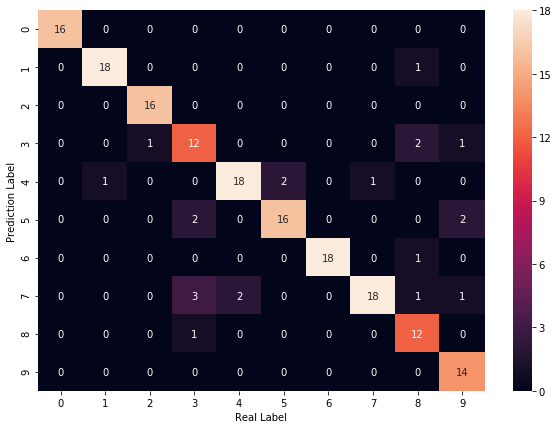

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:66 index:[5] real:5
#1 min_error:80 index:[3] real:2
#2 min_error:80 index:[8] real:8
#3 min_error:16 index:[0] real:0
#4 min_error:67 index:[1] real:1
#5 min_error:46 index:[7] real:7
#6 min_error:44 index:[6] real:6
#7 min_error:52 index:[3] real:3
#8 min_error:36 index:[2] real:2
#9 min_error:65 index:[1] real:1
#10 min_error:80 index:[7] real:7
#11 min_error:77 index:[7] real:4
#12 min_error:43 index:[6] real:6
#13 min_error:48 index:[3] real:3
#14 min_error:67 index:[1] real:1
#15 min_error:64 index:[3] real:3
#16 min_error:75 index:[7] real:9
#17 min_error:63 index:[1] real:1
#18 min_error:72 index:[7] real:7
#19 min_error:24 index:[6] real:6
#20 min_error:68 index:[8] real:8
#21 min_error:52 index:[4] real:4
#22 min_error:51 index:[3] real:3
#23 min_error:75 index:[1] real:1
#24 min_error:40 index:[4] real:4
#25 min_error:31 index:[0] real:0
#26 min_error:43 index:[5] real:5
#27 min_error:41 index:[3] real:3
#28 min_error:66 index:[6] real:6
#29 min_error:61 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9047619047619048
Avg Base Learner:0.7866790352504638


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

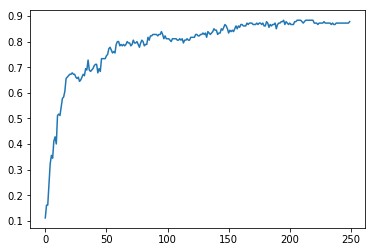

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4611 Total connections::4888
